# Машинное обучение. Задание 1. 

### Задание по numpy:
##### 1. Напишите свой аналог np.linspace с использованием цикла и с использованием list comprehension. Сравните все три варианта по производительности.

In [19]:
import numpy as np

left_border = -1
right_border = 3
N = 10000

def cycle_linspace(left_border, right_border, N):
    x = np.ndarray(N)
    step = float(right_border - left_border) / (N - 1)
    for i in range(0, N):
        x[i] = left_border + step * i
    return x

def list_comprehension_linspace(left_border, right_border, N):
    step = float(right_border - left_border) / (N - 1)
    x = [left_border + step * n for n in range(0, N)]
    return x

x = np.linspace(left_border, right_border, N)
y = cycle_linspace(left_border, right_border, N)
z = list_comprehension_linspace(left_border, right_border, N)

print 'numpy.linspace:'
print type(x)
%timeit np.linspace(left_border, right_border, N)

print '\n\n\n'
print 'cycle_linspace:'
print type(y)
%timeit cycle_linspace(left_border, right_border, N)

print '\n\n\n'
print 'list_comprehension_linspace:'
print type(z)
%timeit list_comprehension_linspace(left_border, right_border, N)

numpy.linspace:
<type 'numpy.ndarray'>
10000 loops, best of 3: 42.5 µs per loop




cycle_linspace:
<type 'numpy.ndarray'>
1000 loops, best of 3: 1.23 ms per loop




list_comprehension_linspace:
<type 'list'>
1000 loops, best of 3: 845 µs per loop


#### 2. Сравните по производительности основные операции с массивами (array) numpy и с list.

In [81]:
a = [0.0]
for i in range(0, N):
    a.append(np.random.rand())
b = np.random.randn(N)

In [82]:
print 'append:'
print '\n list: '
%timeit a.append(1)
print '\n array: '
%timeit np.append(b, 1)

append:

 list: 
10000000 loops, best of 3: 54.2 ns per loop

 array: 
The slowest run took 11.13 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 5.93 µs per loop


In [22]:
print 'insert:'
print '\n list: '
%timeit a.insert(1, 1)
print '\n array: '
%timeit np.insert(b, 1, 1)

insert:

 list: 
10 loops, best of 3: 52.7 ms per loop

 array: 
The slowest run took 8.74 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 10.2 µs per loop


In [23]:
print 'sort:'
print '\n list: '
%timeit a.sort()
print '\n array: '
%timeit np.sort(b)

sort:

 list: 
1 loop, best of 3: 355 ms per loop

 array: 
1000 loops, best of 3: 471 µs per loop


In [24]:
print 'remove:'
print '\n list: '
%timeit a.remove(a[0])
print '\n array: '
%timeit np.delete(b, b[0])

remove:

 list: 
10 loops, best of 3: 57 ms per loop

 array: 
The slowest run took 6.77 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 27.1 µs per loop


#### Видно, что производительность большинства из рассмотренных функций (икслючение - append) выше на numpy.array.

### Задание по scipy
#### Попробуйте поменять метод оптимизации в примере решения оптимизационной задачи выше, и подобрать метод с наименьшим количеством вычислений функции. Начальное приближение оставьте тем же.

In [25]:
from scipy import optimize

In [26]:
def f(x):
    return (x[0] - 3.2) ** 2 + (x[1] - 0.1) ** 2 + 3

In [10]:
x_min = optimize.minimize(f, [5, 5], method='COBYLA') #Constrained Optimization BY Linear Approximation
print x_min

     fun: 3.0000000121604393
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 47
  status: 1
 success: True
       x: array([ 3.20010035,  0.09995428])


In [11]:
x_min = optimize.minimize(f, [5, 5], method='Powell') 
#performs sequential one-dimensional minimizations along each vector of the directions set 
print x_min

   direc: array([[ 1.,  0.],
       [ 0.,  1.]])
     fun: 3.0
 message: 'Optimization terminated successfully.'
    nfev: 92
     nit: 2
  status: 0
 success: True
       x: array([ 3.19999999,  0.10000001])


In [12]:
x_min = optimize.minimize(f, [5, 5], method='Nelder-Mead') #Simplex algorithm 
print x_min

 final_simplex: (array([[ 3.20001992,  0.09998117],
       [ 3.19995515,  0.0999887 ],
       [ 3.19996773,  0.09995848]]), array([ 3.,  3.,  3.]))
           fun: 3.0000000007515375
       message: 'Optimization terminated successfully.'
          nfev: 87
           nit: 45
        status: 0
       success: True
             x: array([ 3.20001992,  0.09998117])


#### Среди рассмотренных методов наилучшим в смысле числа вычислений значения функции оказался метод линейного приближения.

### Задание по Matplotlib

#### 1.Добавьте подписи к осям и легенду к примеру выше (см. документацию)

In [13]:
%matplotlib inline

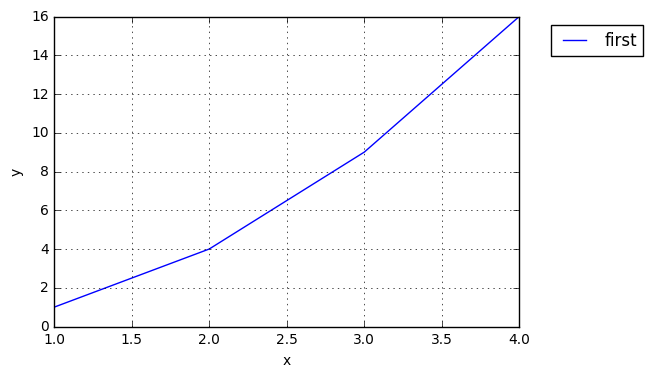

In [73]:
from matplotlib import pylab as plt

plt.plot([1, 2, 3, 4], [1, 4, 9, 16], label = 'first', )
plt.xlabel('x')
plt.ylabel('y')
plt.legend(bbox_to_anchor=(1.05, 1), loc = 2)
plt.grid(True)
plt.show()

#### 2. Постройте график с 5 разными элементарными функциями и сделайте легенду к графику в TeXe

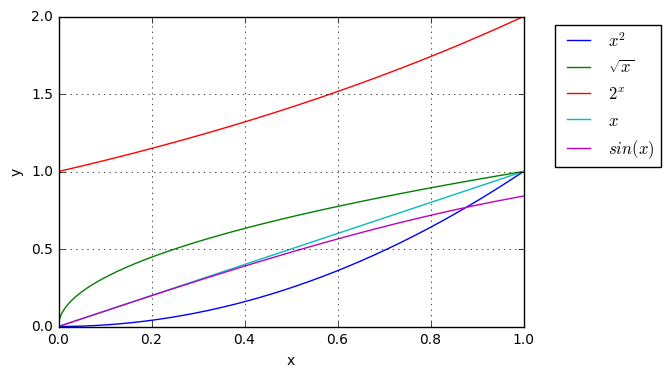

In [83]:
from math import sin
x = np.linspace(0, 1, N)
y = [sin(x[i]) for i in range(0, N)]

plt.plot(x, x**2, label = "$x^2$")
plt.plot(x, x**0.5, label = "$\sqrt{x}$")
plt.plot(x, 2**x, label = "$2^x$")
plt.plot(x, x, label = "$x$")
plt.plot(x, y, label = "$sin(x)$")

plt.legend(bbox_to_anchor=(1.05, 1), loc = 2)
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
fig = plt.gcf()
plt.show()
fig.savefig('3.png', dpi=100) #сохранили картинку